### Uncover the factors that lead to employee attrition.
### Show graphically using density charts:
### Show influence of different factors on attrition rate
### Which department is facing a major attrition problem.
### Show a breakdown of distance from home by job role and attrition’
### compare average monthly income by education and attrition
### Provide few solutions to the problem of attrition at the company.

# to estimate the factors corresponding to Attrition rate of employees.

In [59]:
### Import the required packages
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [60]:
df = pd.read_csv("Attrition Data.csv")

In [61]:
df.shape

(1470, 25)

In [62]:
df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,Yes,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,Yes,11,3,1,8,1,6,4,0,5
1,No,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,No,23,4,4,10,3,10,7,1,7
2,Yes,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,Yes,15,3,2,7,3,0,0,0,0
3,No,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,Yes,11,3,3,8,3,8,7,3,0
4,No,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,No,12,3,4,6,3,2,2,2,2


In [5]:
df.info() #as can be seen , no null data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobRole                   1470 non-null   object
 11  JobSatisfaction           1470 non-null   int64 
 12  MaritalStatus             1470 non-null   object
 13  MonthlyIncome             1470 non-null   int64 
 14  NumCompaniesWorked      

In [6]:
corr = df.corr()
corr                      #no corr is greater than 0.8

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.001686,0.208034,0.010146,0.029820,-0.004892,0.497855,0.299635,0.003634,0.001904,0.053535,0.680381,-0.021490,0.311309,0.212901,0.216513,0.202089
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,0.008783,-0.003669,-0.017014,-0.029251,0.040235,0.027110,0.006557,0.004628,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,0.021042,1.000000,-0.027128,0.042438,-0.011296,0.094961,0.126317,-0.011111,-0.024539,-0.009118,0.148280,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.008278,-0.006784,-0.006259,0.012594,-0.031701,-0.029548,0.007665,-0.002693,0.027627,0.001458,0.018007,0.016194,-0.004999
JobInvolvement,0.029820,0.008783,0.042438,-0.008278,1.000000,-0.021476,-0.015271,0.015012,-0.017205,-0.029071,0.034297,-0.005533,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,-0.021476,1.000000,-0.007157,-0.055699,0.020002,0.002297,-0.012454,-0.020185,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.015271,-0.007157,1.000000,0.149515,-0.027269,-0.017120,0.025873,0.772893,0.030683,0.514285,0.363818,0.344978,0.344079
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,0.015012,-0.055699,0.149515,1.000000,-0.010238,-0.014095,0.052733,0.237639,-0.008366,-0.118421,-0.090754,-0.036814,-0.110319
PercentSalaryHike,0.003634,0.040235,-0.011111,-0.031701,-0.017205,0.020002,-0.027269,-0.010238,1.000000,0.773550,-0.040490,-0.020608,-0.003280,-0.035991,-0.001520,-0.022154,-0.011985
PerformanceRating,0.001904,0.027110,-0.024539,-0.029548,-0.029071,0.002297,-0.017120,-0.014095,0.773550,1.000000,-0.031351,0.006744,0.002572,0.003435,0.034986,0.017896,0.022827


# as can be seen, age, monthly income and being single have the highest effect on attrition rate

<AxesSubplot:>

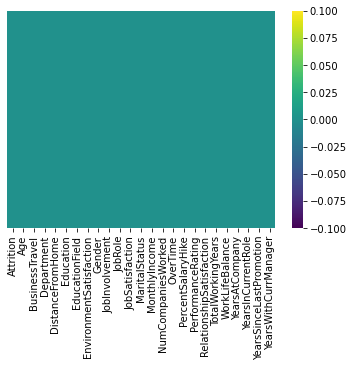

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

<AxesSubplot:xlabel='Attrition', ylabel='count'>

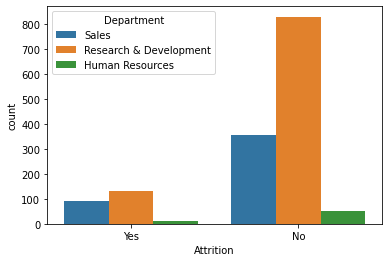

In [8]:
sns.countplot(x="Attrition",hue="Department",data=df) 

# # so,as can be seen the most attrition rate is in R&D ,followed by sales, and H.R                                                    

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

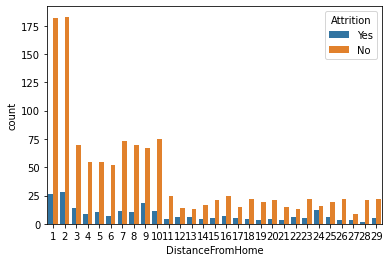

In [9]:
sns.countplot(x="DistanceFromHome",hue="Attrition",data=df) 

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

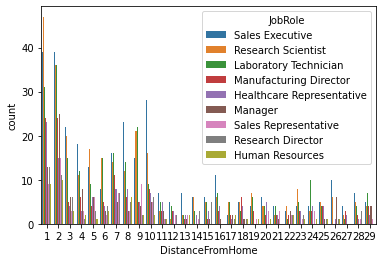

In [10]:
sns.countplot(x="DistanceFromHome",hue="JobRole",data=df) 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='count'>

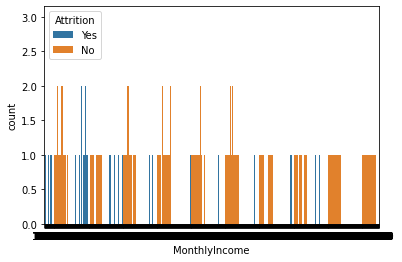

In [11]:
sns.countplot(x="MonthlyIncome",hue="Attrition",orient = "h", data=df) 

<AxesSubplot:xlabel='MonthlyIncome', ylabel='count'>

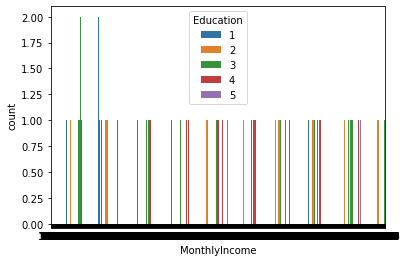

In [12]:
sns.countplot(x="MonthlyIncome",hue="Education",orient = "h", data=df) 

<AxesSubplot:xlabel='Attrition', ylabel='count'>

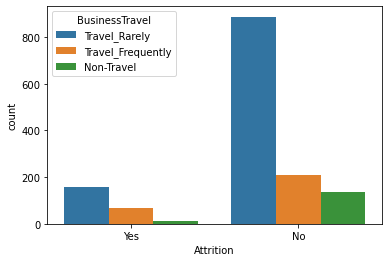

In [13]:
sns.countplot(x="Attrition",hue="BusinessTravel",data=df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

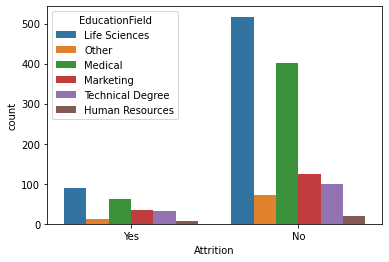

In [14]:
sns.countplot(x="Attrition",hue="EducationField",data=df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

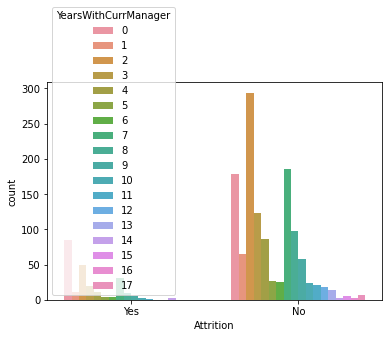

In [65]:
sns.countplot(x="Attrition",hue="YearsWithCurrManager",data=df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

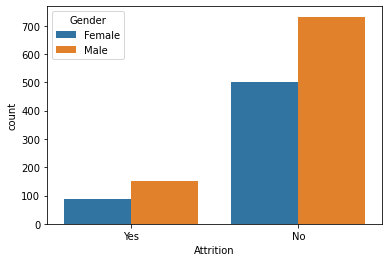

In [15]:
sns.countplot(x="Attrition",hue="Gender",data=df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

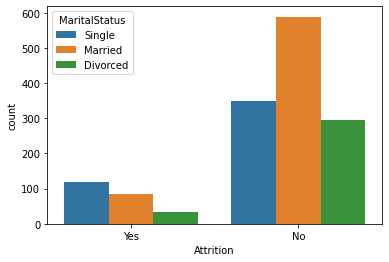

In [16]:
sns.countplot(x="Attrition",hue="MaritalStatus",data=df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

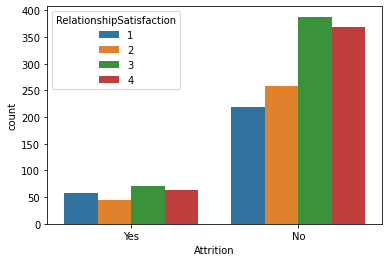

In [17]:
sns.countplot(x="Attrition",hue="RelationshipSatisfaction",data=df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

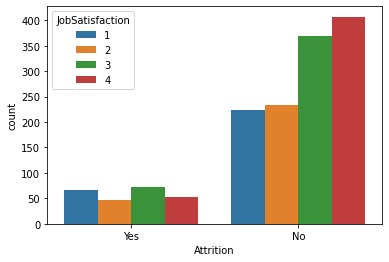

In [18]:
sns.countplot(x="Attrition",hue="JobSatisfaction",data=df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

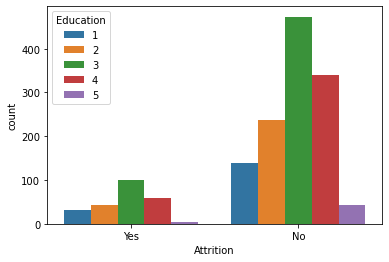

In [63]:
sns.countplot(x="Attrition",hue="Education",data=df)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

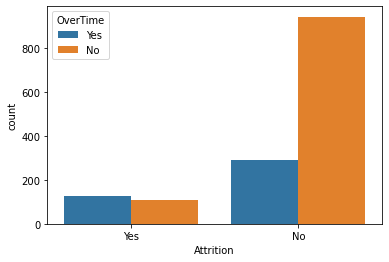

In [19]:
sns.countplot(x="Attrition",hue="OverTime",data=df)

In [20]:
df = df.drop('JobRole',axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   object
 1   Age                       1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobSatisfaction           1470 non-null   int64 
 11  MaritalStatus             1470 non-null   object
 12  MonthlyIncome             1470 non-null   int64 
 13  NumCompaniesWorked        1470 non-null   int64 
 14  OverTime                

## creating dummy variables to convert categorical datatypes to numerical
## and adding them to the list of columns

In [21]:
attrition =pd.get_dummies(df["Attrition"],prefix=['attrition'],drop_first=True)
attrition.head()

,['attrition']_Yes
0,1
1,0
2,1
3,0
4,0


In [22]:
businessTravel= pd.get_dummies(df["BusinessTravel"],drop_first=True)
businessTravel.head()  #100 for non-travel

,Travel_Frequently,Travel_Rarely
0,0,1
1,1,0
2,0,1
3,1,0
4,0,1


In [23]:
department= pd.get_dummies(df["Department"],drop_first=True)
department.head()  #100 for H.R

,Research & Development,Sales
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [24]:
educationField = pd.get_dummies(df["EducationField"],drop_first=True)
educationField.head()  #00000 for H.R

,Life Sciences,Marketing,Medical,Other,Technical Degree
0,1,0,0,0,0
1,1,0,0,0,0
2,0,0,0,1,0
3,1,0,0,0,0
4,0,0,1,0,0


In [25]:
gender = pd.get_dummies(df["Gender"],drop_first=True)
gender.head()  

,Male
0,0
1,1
2,1
3,0
4,1


In [26]:
maritalStatus = pd.get_dummies(df["MaritalStatus"],drop_first=True)
maritalStatus.head()  #001 for divorced

,Married,Single
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0


In [27]:
overTime = pd.get_dummies(df["OverTime"],prefix=['overtime'],drop_first=True)
overTime.head() 

,['overtime']_Yes
0,1
1,0
2,1
3,1
4,0


In [28]:
df=pd.concat([df,attrition,businessTravel,overTime,maritalStatus,gender,educationField,department],axis=1)
df.head()

,Attrition,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,Married,Single,Male,Life Sciences,Marketing,Medical,Other,Technical Degree,Research & Development,Sales
0,Yes,41,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,0,1,0,1,0,0,0,0,0,1
1,No,49,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,1,0,1,1,0,0,0,0,1,0
2,Yes,37,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,0,1,1,0,0,0,1,0,1,0
3,No,33,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,1,0,0,1,0,0,0,0,1,0
4,No,27,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,1,0,1,0,0,1,0,0,1,0


In [29]:
df.drop(["Attrition","BusinessTravel","OverTime","MaritalStatus","Gender","EducationField","Department"],axis=1,inplace=True)
df.head()   # Dropping the categorical columns now as they're unnecessary

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,Married,Single,Male,Life Sciences,Marketing,Medical,Other,Technical Degree,Research & Development,Sales
0,41,1,2,2,3,4,5993,8,11,3,...,0,1,0,1,0,0,0,0,0,1
1,49,8,1,3,2,2,5130,1,23,4,...,1,0,1,1,0,0,0,0,1,0
2,37,2,2,4,2,3,2090,6,15,3,...,0,1,1,0,0,0,1,0,1,0
3,33,3,4,4,3,3,2909,1,11,3,...,1,0,0,1,0,0,0,0,1,0
4,27,2,1,1,3,2,3468,9,12,3,...,1,0,1,0,0,1,0,0,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   DistanceFromHome          1470 non-null   int64
 2   Education                 1470 non-null   int64
 3   EnvironmentSatisfaction   1470 non-null   int64
 4   JobInvolvement            1470 non-null   int64
 5   JobSatisfaction           1470 non-null   int64
 6   MonthlyIncome             1470 non-null   int64
 7   NumCompaniesWorked        1470 non-null   int64
 8   PercentSalaryHike         1470 non-null   int64
 9   PerformanceRating         1470 non-null   int64
 10  RelationshipSatisfaction  1470 non-null   int64
 11  TotalWorkingYears         1470 non-null   int64
 12  WorkLifeBalance           1470 non-null   int64
 13  YearsAtCompany            1470 non-null   int64
 14  YearsInCurrentRole        1470 non-null 

In [57]:
corr = df.corr()
corr         

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,...,Married,Single,Male,Life Sciences,Marketing,Medical,Other,Technical Degree,Research & Development,Sales
Age,1.000000,-0.001686,0.208034,0.010146,0.029820,-0.004892,0.497855,0.299635,0.003634,0.001904,...,0.083919,-0.119185,-0.036311,0.016824,0.038162,-0.006354,-0.041466,-0.027604,0.017883,-0.027549
DistanceFromHome,-0.001686,1.000000,0.021042,-0.016075,0.008783,-0.003669,-0.017014,-0.029251,0.040235,0.027110,...,0.030232,-0.027445,-0.001851,-0.024499,0.039294,0.013486,-0.007969,-0.014802,-0.008117,0.014085
Education,0.208034,0.021042,1.000000,-0.027128,0.042438,-0.011296,0.094961,0.126317,-0.011111,-0.024539,...,-0.001865,0.004168,-0.016547,0.013184,0.072405,-0.072335,0.038043,-0.026742,-0.018604,0.014215
EnvironmentSatisfaction,0.010146,-0.016075,-0.027128,1.000000,-0.008278,-0.006784,-0.006259,0.012594,-0.031701,-0.029548,...,-0.022180,0.009035,0.000508,-0.024526,0.000479,-0.021299,0.064602,0.027713,0.027976,-0.025606
JobInvolvement,0.029820,0.008783,0.042438,-0.008278,1.000000,-0.021476,-0.015271,0.015012,-0.017205,-0.029071,...,0.028324,-0.045253,0.017960,0.003228,-0.018657,0.017103,-0.011895,-0.004519,0.023187,-0.026107
JobSatisfaction,-0.004892,-0.003669,-0.011296,-0.006784,-0.021476,1.000000,-0.007157,-0.055699,0.020002,0.002297,...,-0.010315,0.024571,0.033252,0.052004,-0.023528,-0.022645,0.003380,-0.019795,-0.002798,0.013499
MonthlyIncome,0.497855,-0.017014,0.094961,-0.006259,-0.015271,-0.007157,1.000000,0.149515,-0.027269,-0.017120,...,0.056767,-0.089361,-0.031858,-0.007054,0.062576,0.001025,-0.022279,-0.049695,-0.064720,0.063978
NumCompaniesWorked,0.299635,-0.029251,0.126317,0.012594,0.015012,-0.055699,0.149515,1.000000,-0.010238,-0.014095,...,-0.016142,-0.019161,-0.039147,-0.006131,-0.018611,0.024826,-0.012870,-0.013819,0.022237,-0.032097
PercentSalaryHike,0.003634,0.040235,-0.011111,-0.031701,-0.017205,0.020002,-0.027269,-0.010238,1.000000,0.773550,...,0.020895,-0.001386,0.002733,0.010209,-0.027726,0.029116,0.019297,-0.042701,0.030735,-0.020403
PerformanceRating,0.001904,0.027110,-0.024539,-0.029548,-0.029071,0.002297,-0.017120,-0.014095,0.773550,1.000000,...,0.009585,-0.001045,-0.013859,0.010853,-0.020918,0.014868,0.011449,-0.021729,0.032720,-0.031050


<AxesSubplot:>

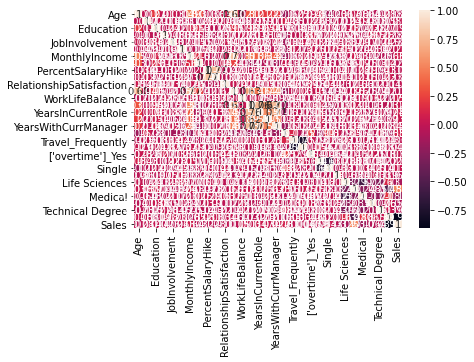

In [32]:
sns.heatmap(corr,annot=True)

# splitting the data

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [34]:
X=df.drop("['attrition']_Yes",axis=1)
y=df["['attrition']_Yes"]

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

# Logistic Regression

In [36]:
model=LogisticRegression()
model.fit(X_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
predictions=model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.8503401360544217

In [39]:
from sklearn import metrics
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       380
           1       0.33      0.08      0.13        61

    accuracy                           0.85       441
   macro avg       0.60      0.53      0.52       441
weighted avg       0.79      0.85      0.81       441



In [40]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[370,  10],
       [ 56,   5]], dtype=int64)

<AxesSubplot:>

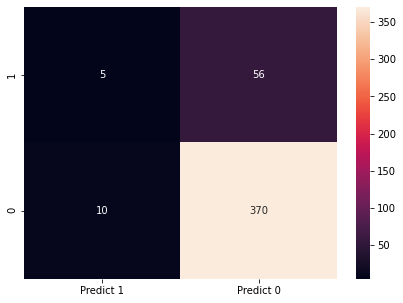

In [41]:
from sklearn import metrics
cm=metrics.confusion_matrix(y_test, predictions, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='g')

#as can be seen the F.p are 10,and T.N are 56, where we should try to reduce T.N effectively

# DESICIONTREE

In [42]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [43]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

# as can be seen its overfitting

1.0
0.7687074829931972


In [44]:
train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = tree.export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

# reduce overfitting (Regularization)

In [45]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state=1)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))        # curbing the no. of trees to 4

0.8726919339164237
0.8684807256235828


In [46]:
dTreeR1 = DecisionTreeClassifier(criterion = 'entropy', max_depth =5, random_state=1)
dTreeR1.fit(X_train, y_train)
print(dTreeR1.score(X_train, y_train))
print(dTreeR1.score(X_test, y_test))   #checking with entropy, with depth 5

0.8824101068999028
0.873015873015873


0.873015873015873


<AxesSubplot:>

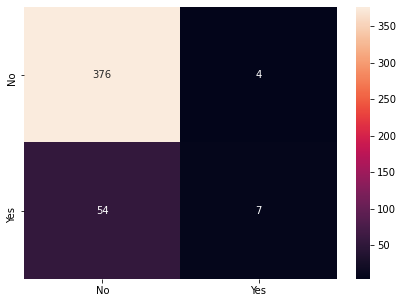

In [47]:
print(dTreeR1.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')      # no. of T.N are 54


# ENSEMBLE-Bagging

In [48]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(base_estimator=dTree,n_estimators=100,random_state=1)
#bgcl = BaggingClassifier(n_estimators=100,random_state=1)

bgcl = bgcl.fit(X_train, y_train)
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

0.8571428571428571


<AxesSubplot:>

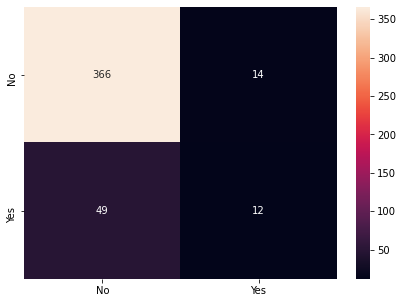

In [49]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')  #T.N reduced to 49 but F.P increased to 14

# ENSEMBLE - Ada boosting

In [50]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=180, random_state=1)
                                     #abcl = AdaBoostClassifier( n_estimators=180,random_state=1)
abcl = abcl.fit(X_train, y_train)
                                    # no.of estimators =180 is the best choice.
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

0.8752834467120182


<AxesSubplot:>

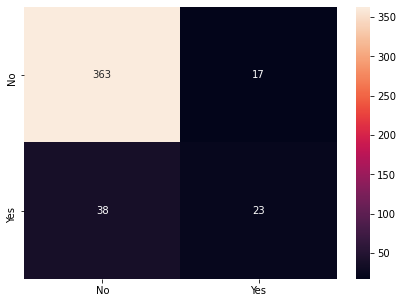

In [51]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')   # #T.N reduced to 38 but F.P increased to 17

# ENSEMBLE - Gradient Boosting

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50,random_state=1)
gbcl = gbcl.fit(X_train, y_train)
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))

0.8707482993197279


<AxesSubplot:>

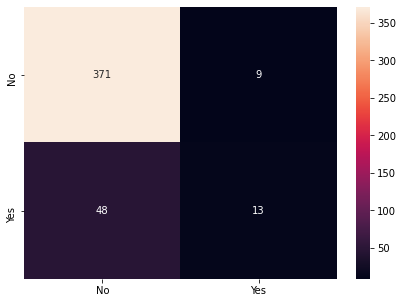

In [53]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g') #T.N = 48, F.P = 9

# Ensemble RandomForest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 200, random_state=1,max_features=12)
rfcl = rfcl.fit(X_train, y_train)
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))  # 12 no. of feauters is the best choice

0.8594104308390023


<AxesSubplot:>

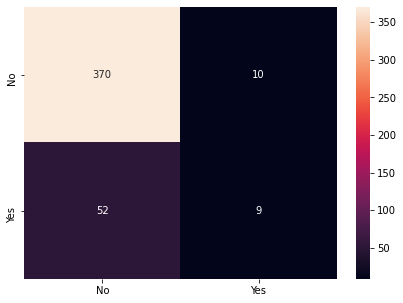

In [55]:
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

# as can be seen, ADA-Boosting is the best model with an accuracy of 87.5%,  followed by decisiontree with entropy as criterion with regularisation,with accuracy of 87.3%

# OBSERVATIONS and SUGGESTIONS to reduce Attrition rate

## for the company to reduce Attrition, it has to focus on it's R&D Department.. as they're facing highest Attrition rate

## and factors like Age,Monthly income and Being single play a key role..so, it  might help to give some pay-rises, and staff of high age have less attrition,so try to employ experienced staff..

## the male staff is facing a little higher Attrition rate than female staff


## as Environment satisfaction and Job satisfaction play a role too.., a proper complaint maintenance system for solving problems of work-environment..will definitley help to reduce Attrition

## and also,staff who travel rarely have a high Attrition rate,so travelling might help reduce Attrition..

## staff who work overtime are likely to face attrition,so distributing the work-load, might work effectively..

## and also, staff who have worked under the same manager for a long time..have a less Attrition rate.. so,mantaing the same teams,will be benificial..

## and other factors like Distance from home,no.of years in education,dont have a distinct pattern,but do play a role..